Engy-5140: Chemical and Nuclear Waste Processing Fall 2019 UMass Lowell; Prof. V. F. de Almeida **28Oct2019**

# Homework 03 28Oct2019 Solution DCA

### Name: `your name`

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Individual work. Be clear and complete in your answers.
    </span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    During your work and before submitting the final version do: `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

---
### Table of Contents
* [Problem Statement](#statement)
* [Notes](#notes)
* [Problem 1 (50 pts)](#p1)
* [Problem 2 (50 pts)](#p2)
---

### <span style="color:blue"> Problem Statement </span> <a id="statement"></a>

#### <span style="color:blue"> Ground water at volumetric flow rate of 1,500 gpm, containing three volatile organic compounds (VOCs), is to be treated by countercurrent air stripping in a trayed column to produce drinking water that meets EPA standards (see data below). </span>


| Component | K-value | Groundwater (ppm) | EPA drinking water tolerance (ppm) |
| --------- | ------- | ----------- | ---------------------------- |
| 1,2-Dichloroethane (DCA) | 60 | 85 | 0.005 |
| Trichloroethylene (TCE) | 650 | 120 | 0.005 |
| 1,1,1-Trichloroethane (TCA) | 275 | 145 | 0.200 |

ppm is parts per million by mass (assume 1 ppm in water = 1 mg/L).

#### <span style="color:blue"> Using the network modeling approach covered in this course, provide answers to the problems below (based on Seader, Henly, and Roper textbook Separation Process Principles Chap. 6, 2016) . </span>

### <span style="color:blue"> Notes </span> <a id="notes"></a>

Some notes for this problem:

  + In-class course notes OneNote [Engy-5140-noneq-absorption](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgwN25gp8ytGpdRItJdVRf4B7s_LLH76ODb7f6lSscvMCg?e=LqhrPg).
  + In-class course notes OneNote [Engy-hwk03-notes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EnudBfSpdE5NgGYxZx0cGQ0BdPPXIArbtNlI0CFrrepKig?e=CjwuAy).

### <span style="color:blue"> Problem 1 (50 pts) </span> <a id="p1"></a>

1. <span style="color:blue"> Compute the minimum air flow rate in scfm (60$^\circ$F, 1 atm).</span> [Answer p1.1](#ap11)
2. <span style="color:blue"> Compute the number of equilibrium stages (or nodes) if the air flow rate is twice the minimum required and the tower operates at 25$^\circ$C and 1 atm.</span> [Answer p1.2](#ap12)
3. <span style="color:blue"> Compute the composition of each VOC in ppm (parts per million) in the resulting drinking water.</span> [Answer p1.3](#ap13)
4. <span style="color:blue"> Compare the K-values provided against tabulated values of the Henry's constant in the literature (see the Harzardous Waste reference book).</span> [Answer p1.4](#ap14)

| Component | A | B | H [atm m$^3$/mol]; T(K) |
| --------- | ------- | ---------------------------- |-----|
| 1,2-Dichloroethane (DCA) | -4.02 10$^3$ | 6.94 | $\ln H = \frac{A}{T} + B$ |
| Trichloroethylene (TCE) | 1.14 10 | 4.78 10$^3$  | $H=\exp(A - \frac{B}{T})$ |
| 1,1,1-Trichloroethane (TCA) | 9.78 | 4.13 10$^3$  | $H=\exp(A - \frac{B}{T})$ |

In [1]:
'''Plot Diagram Function'''

def plot_diagram(xpts,ypts):
    
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(1, figsize=(15, 6))

    xpts = np.array(xpts)
    ypts = np.array(ypts)

    # plot equilibrium line
    plt.plot( (0,xpts.max()), (0,eq_func(xpts.max())),'ro-',label='Equilibrium Line')
    
    # plot operating line
    plt.plot( op_func(ypts), ypts,'b-',label='Operating Line' )

    # plot all step off diagram nodes
    plt.plot( xpts, ypts, 'ko-',label='Stepping off' )

    plt.xlabel(r'$\rho_{A,L}$ [mg/L]',fontsize=18)
    plt.ylabel(r'$\rho_{A,G}$ [mg/L]',fontsize=18)
    plt.title(r'Gas Stripping Diagram T=%2.1f C'%const.convert_temperature(temp,'K','C'),fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.grid()
    plt.show()
    print('')

In [2]:
'''Plot Solution Function'''

def plot_solution(table):
    
    import matplotlib.pyplot as plt
    import numpy as np

    (fig, ax) = plt.subplots(figsize=(15,6))

    # liquid solute concentration
    ax.plot( range(len(table['k'])), table['rho_A_L(k)'], 'bo-',label=r'$\rho_{A,L}$' )
    ax.plot( range(len(table['k'])), table['rho_A_G(k)'], 'o-',color='orange',label=r'$\rho_{A,G}$' )
    
    plt.xticks(range(len(table['k'])),['node-'+str(k) for k in table['k']],rotation=30,fontsize=12)

    #plt.xlabel(r'k',fontsize=18)
    plt.ylabel(r'$\rho_{A,\alpha}$ [mg/L]',fontsize=18)
    plt.title(r'Gas Absorption Solution T=%2.1f C'%const.convert_temperature(temp,'K','C'),fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.grid()
    plt.show()
    print('')

In [3]:
'''Conditions'''

# Preliminaries
import math
import pandas as pd
import scipy.constants as const

# SI units conversion
const.meter  = 1.0
const.mol    = 1.0
const.ppm    = 1e-6
const.second = 1.0
const.centimeter   = const.centi*const.meter
const.millimeter   = const.milli*const.meter
const.mg_per_liter = const.milli*const.gram/const.liter
const.gpm          = const.gallon/const.minute
const.cfm          = const.foot**3/const.minute
const.gmol         = const.gram/const.mol

# Parameters
temp_C = 25
temp   = const.convert_temperature(temp_C,'C','K')

pressure = 1 * const.atm

f_L = 1500 * const.gpm

In [12]:
'''Air stripping of 1,2-dichloroethane from water'''

print('Temperture = %5.4f [C]  = %5.4f [F] = %5.4f [K] '%(temp_C, const.convert_temperature(temp_C,'C','F'),
                                                                temp))
print('Pressure   = %5.4f [Pa] = %5.4f [atm] '%(pressure, pressure/const.atm))
print('')

mass_dens_L  = 997.05 * const.kilo * const.gram / const.meter**3 # (assume pure H2O at 25C)

molar_mass_air = 28.9647 * const.gmol                # (molar mass of dry air)
molar_mass_G   = molar_mass_air

partition_coef = 60

partition_coef_mod = partition_coef * molar_mass_G * pressure / const.R / temp / mass_dens_L

# Top of tower
w_A_L_N1   = 85 * const.ppm         # mass fraction
rho_A_L_N1 = mass_dens_L * w_A_L_N1 # mass concentration

# Bottom of tower
w_A_L_1    = 0.005 * const.ppm
rho_A_L_1  = mass_dens_L * w_A_L_1 

# Bottom of tower
rho_A_G_0  = 0.0

# Overall mass balance with equilibrium condition at the top end
f_G_min = f_L / partition_coef_mod * ( 1 - rho_A_L_1/rho_A_L_N1 )

f_G_f_L_ratio_min = f_G_min / f_L

# Stripping factor
strip_factor_min = f_G_f_L_ratio_min / partition_coef_mod**-1

print('Flowrate L     = %5.4f [m^3/s] = %5.4f [gpm]'%(f_L, f_L/const.gpm))
print('Flowrate G min = %5.4f [m^3/s] = %5.4f [gpm] = %5.4f [cfm]'%(f_G_min, f_G_min/const.gpm, f_G_min/const.cfm))
print('')
print('F_G_min/F_L = %5.4f'%(f_G_f_L_ratio_min))
print('')
print('Partition coef. modified [] = %5.4f'%(partition_coef_mod))

print('')
print('Min stripping factor = %5.5f'%strip_factor_min)

Temperture = 25.0000 [C]  = 77.0000 [F] = 298.1500 [K] 
Pressure   = 101325.0000 [Pa] = 1.0000 [atm] 

Flowrate L     = 0.0946 [m^3/s] = 1500.0000 [gpm]
Flowrate G min = 1.3282 [m^3/s] = 21053.0297 [gpm] = 2814.3807 [cfm]

F_G_min/F_L = 14.0354

Partition coef. modified [] = 0.0712

Min stripping factor = 0.99994


In [5]:
'''Standard cubic feet per minute calculation'''

# Overall mass balance
rho_A_G_N = ( rho_A_L_N1 - rho_A_L_1 ) / f_G_f_L_ratio_min
print('Target [A] in exiting gas = %5.3f [mg/L]'%(rho_A_G_N/const.mg_per_liter))

# Averate molar mass of the gas
molar_mass_DCA = 98.95 * const.gmol
rho_A_G_mean = (0 + rho_A_G_N)/2.0
molar_mass_G = molar_mass_air + (1 - molar_mass_air/molar_mass_DCA) * rho_A_G_mean * const.R * temp / pressure
print('')
print('Molar mass of air        [g/mol] = ', molar_mass_air/const.gmol)
print('Molar mass of gas (mean) [g/mol] = ', molar_mass_G/const.gmol)

p_std = 1 * const.atm
v_std = 1 * const.foot**3
t_std = const.convert_temperature(60,'F','K')
n_std = p_std * v_std / const.R / t_std

mass_dens_G = pressure * molar_mass_G / const.R / temp
f_G_min_scfm = f_G_min*const.minute * mass_dens_G / molar_mass_G / n_std
print('')
print('Flowrate G min [scfm] = %5.4f'%(f_G_min_scfm))

Target [A] in exiting gas = 6.038 [mg/L]

Molar mass of air        [g/mol] =  28.9647
Molar mass of gas (mean) [g/mol] =  29.016939648390302

Flowrate G min [scfm] = 2725.2301


Answer 1.1)<a id="ap11"></a>: Flowrate G min [scfm] = 2725.2301  

In [6]:
'''Air stripping of 1,2-dichloroethane from water'''

f_G = 2 * f_G_min  # from problem statement

f_G_f_L_ratio = f_G / f_L
strip_factor = f_G_f_L_ratio / partition_coef_mod**-1

print('Flow rate G = %5.4f [m^3/s] = %5.4f [gpm]'%(f_G, f_G/const.gpm))
print('Stripping factor = %5.4f'%strip_factor)

# Overall mass balance
rho_A_G_N = ( rho_A_L_N1 - rho_A_L_1 ) / f_G_f_L_ratio
print('Target [A] in exiting gas = %5.3f [mg/L]'%(rho_A_G_N/const.mg_per_liter))

# Equilibrium line definition: y = a x
eq_func = lambda x: partition_coef_mod * x

# Operating line definition: x = a y + b
op_slope = strip_factor * partition_coef_mod**-1
b = rho_A_L_1  # intercept point
op_func = lambda y: op_slope * y + b

# Data storage for graphical output
xpts = list() # x coord. for solution plotting
ypts = list() # y coord. for solution plotting
xpts.append( rho_A_L_1 )
ypts.append( rho_A_G_0 )

# Data storage for a table output
table = dict()
table['k']            = list()
table['rho_A_L(k)']   = list()
table['rho_A_G(k)']   = list()
table['rho_A_L(k+1)'] = list()

# Solve for mass concentrations in the network tower
# Start at the bottom and move towards the top

rho_A_L_k = rho_A_L_1
rho_A_G_k = rho_A_G_0

k_node     = 0
k_node_max = 50
while rho_A_G_k <= rho_A_G_N and k_node <= k_node_max:
    
    table['rho_A_L(k)'].append(rho_A_L_k/const.mg_per_liter)
    
    # Compute equilibrium point
    rho_A_G_k = eq_func(rho_A_L_k)
    
    xpts.append( rho_A_L_k/const.mg_per_liter )
    ypts.append( rho_A_G_k/const.mg_per_liter )
    
    table['rho_A_G(k)'].append(rho_A_G_k/const.mg_per_liter)
    
    # Compute operating line point
    rho_A_L_k = op_func(rho_A_G_k) # overwrite k with k+1
    
    xpts.append(rho_A_L_k/const.mg_per_liter)
    ypts.append(rho_A_G_k/const.mg_per_liter)
    
    table['rho_A_L(k+1)'].append(rho_A_L_k/const.mg_per_liter)
    
    k_node += 1
    
    table['k'].append(k_node)

n_eq_stages = k_node

print('')
print('Number of equilibrium stages = ',n_eq_stages)

import pandas as pd
pd.set_option('display.float_format', '{:.2E}'.format)

df = pd.DataFrame(table)
print('')
print('Mass Concentrations [mg/L] at T = %2.2f'%const.convert_temperature(temp,'K','C'))
print(df)

print('')
print('Concentration of A in exiting gas [mg/L] = %1.3e'%(table['rho_A_G(k)'][-1]))

# Sanity check: compute the average molar mass of the gas
rho_A_G_mean = df['rho_A_G(k)'].mean() * const.mg_per_liter
molar_mass_G = molar_mass_air + (1 - molar_mass_air/molar_mass_DCA) * rho_A_G_mean * const.R * temp / pressure
print('')
print('Molar mass of air [g/mol] = ',molar_mass_air/const.gmol)
print('Molar mass of gas [g/mol] = ',molar_mass_G/const.gmol)

Flow rate G = 2.6565 [m^3/s] = 42106.0594 [gpm]
Stripping factor = 1.9999
Target [A] in exiting gas = 3.019 [mg/L]

Number of equilibrium stages =  14

Mass Concentrations [mg/L] at T = 25.00
     k  rho_A_L(k)  rho_A_G(k)  rho_A_L(k+1)
0    1    4.99E-03    3.55E-04      1.50E-02
1    2    1.50E-02    1.07E-03      3.49E-02
2    3    3.49E-02    2.49E-03      7.48E-02
3    4    7.48E-02    5.33E-03      1.55E-01
4    5    1.55E-01    1.10E-02      3.14E-01
5    6    3.14E-01    2.24E-02      6.33E-01
6    7    6.33E-01    4.51E-02      1.27E+00
7    8    1.27E+00    9.05E-02      2.55E+00
8    9    2.55E+00    1.81E-01      5.10E+00
9   10    5.10E+00    3.63E-01      1.02E+01
10  11    1.02E+01    7.27E-01      2.04E+01
11  12    2.04E+01    1.45E+00      4.08E+01
12  13    4.08E+01    2.91E+00      8.16E+01
13  14    8.16E+01    5.81E+00      1.63E+02

Concentration of A in exiting gas [mg/L] = 5.815e+00

Molar mass of air [g/mol] =  28.9647
Molar mass of gas [g/mol] =  28.979068450

Answer 1.2)<a id="ap12"></a>: Number of equilibrium stages =  14

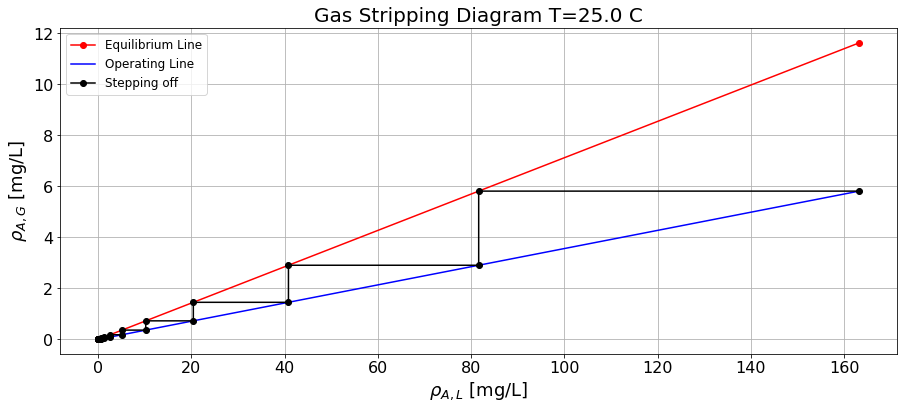

In [8]:
'''Plot the Solution Construction Diagram'''

plot_diagram(xpts,ypts)

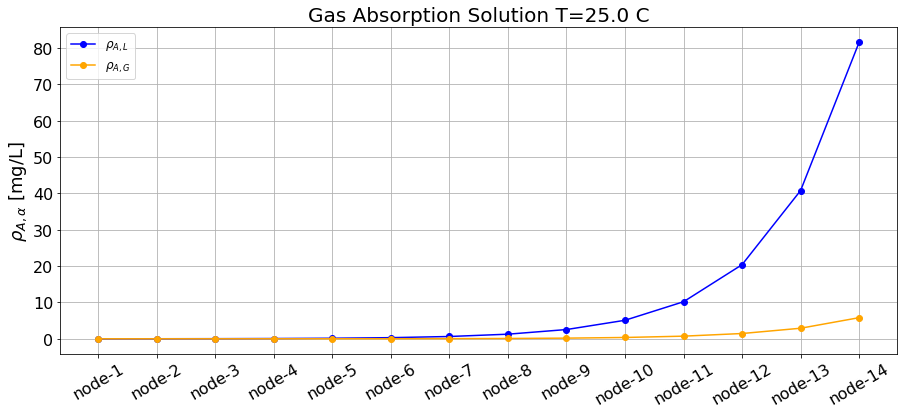

In [9]:
'''Plot the Solute Concentration in the Phases'''

plot_solution(table)

In [ ]:
print('[A] in drinking water = %5.4f [mg/L] or [ppm]'%(table['rho_A_L(k)'][0]))

Answer 1.3)<a id="ap13"></a>: [A] in drinking water = 0.0050 [mg/L] or [ppm]

In [10]:
a_param   = -4.02e3
b_param   =  6.94
henry_cte = math.exp(a_param/temp + b_param) * const.atm*const.meter**3/const.mol

partition_coef = henry_cte/const.gas_constant/temp
print('Partition coef. from Henry"s cte [] = %5.4f'%(partition_coef))
print('')
partition_coef = henry_cte/const.gas_constant/temp
print('Partition coef. modified []         = %5.4f'%(partition_coef_mod))
print('')
print('Error relative to Henry"s [%%] = %5.4f'%((partition_coef_mod-partition_coef)/partition_coef*100))

Partition coef. from Henry"s cte [] = 0.0589

Partition coef. modified []         = 0.0712

Error relative to Henry"s [%] = 21.0474


Answer 1.4)<a id="ap14"></a>: Partition coef. from Henry"s cte [] = 0.0589; Partition coef. modified [] = 0.0712; Error relative to Henry"s [%] = 21.0474 

From the [New Jersey site remediation program](https://www.nj.gov/dep/srp/guidance/rs/), data for Henry's coefficient of DCA in water/air were [found](https://www.nj.gov/dep/srp/guidance/rs/chemproperties.pdf).

### <span style="color:blue"> Problem 2 (50 pts) </span> <a id="p2"></a>

1. <span style="color:blue"> Design a trayed tower for the same flow rates used in Problem 1. </span> [Answer p2.1](#ap21)

2. <span style="color:blue"> What is the efficiency of your tower? </span> [Answer p2.2](#ap22)

3. <span style="color:blue"> Verify whether the concentrations of the VOCs in the water do meet the current EPA standards; show your source of information.</span> [Answer p2.3](#ap23)
4. <span style="color:blue"> Discuss the toxicity of the VOCs according to your sources. </span> [Answer p2.4](#ap24)
5. <span style="color:blue"> Would you consume the water from this water treatment you designed? </span> [Answer p2.5](#ap25)

In [11]:
'''Air stripping of 1,2-dichloroethane from water'''
'''Compute the kinetic energy ratio correlation parameter'''

molar_mass_water = molar_mass_L = 18 * const.gmol

molar_rate_L = mass_dens_L * f_L / molar_mass_water

print( 'Liquid molar rate = %5.4f [kmol/h]'%(molar_rate_L/(const.kilo/const.hour)) )

molar_rate_G = mass_dens_G * f_G / molar_mass_G

print( 'Gas molar rate    = %5.4f [kmol/h]'%(molar_rate_G/(const.kilo/const.hour)) )

F_LV = molar_rate_L / molar_rate_G * molar_mass_water / molar_mass_G * math.sqrt(mass_dens_G/mass_dens_L)
print('')
print('F_LV = %5.4f '%(F_LV))

Liquid molar rate = 18871.2241 [kmol/h]
Gas molar rate    = 391.4028 [kmol/h]

F_LV = 1.0329 


In [ ]:
'''Compute the gas flooding velocity'''

tray_spacing = 36*const.inch # design decision

C_F = 0.15 * const.foot/const.second # from F_LV = 1.0329, 36" spacing

print( 'C_F = %5.4f [m/s] = %5.4f [ft/s]'%(C_F, C_F/(const.foot/const.second)) )

A_d_over_A_T = 0.2 # downcomer area over total cross section area from F_LV >= 1

sigma = 75 * const.dyne / const.centimeter # dyn/cm  water + solute; estimated as lower than water
F_ST = (sigma / (20 * const.dyne / const.centimeter) )**0.2

F_F  = 0.9 # foaming factor

A_h_over_A_a = 0.15 # design decision: fraction of perforated area of cross section gas flow area

perforation_diameter = 6*const.millimeter # design decision

F_HA = 1 # when A_h_over_A_a >= 0.1

C = F_ST * F_F * F_HA * C_F # ft/s

U_f = C * math.sqrt( (mass_dens_L-mass_dens_G)/mass_dens_G )

print('U_f = %5.4f [m/s] = %5.4f [ft/s]'%(U_f,U_f/const.foot*const.second))

In [ ]:
'''Compute tower diameter'''

flood = 0.7 # flooding parameter design decision

D_T = math.sqrt( 4/flood * molar_rate_G * molar_mass_G / mass_dens_G / U_f / math.pi / (1 - A_d_over_A_T) )

print('D_T [m] = %5.4f [m]'%(D_T))

D_T *= 1.15
print('D_T [m] = %5.4f [m]'%(D_T))

In [ ]:
'''Compute the dry pressure drop across tray'''

A_T = math.pi * (D_T/2)**2
A_d = A_d_over_A_T * A_T
A_a = A_T - 2 * A_d
A_h = A_a * A_h_over_A_a

u_0 = molar_rate_G * molar_mass_G / mass_dens_G / A_h # perforation gas speed

print( 'u_0 = %5.4f [m/s] = %5.4f [ft/s]'%(u_0,u_0/(const.foot/const.second)) )

c_0 = 0.75  # orifice coefficient  0.65 to 0.85

h_d = 0.186 * (u_0/(const.foot/const.second))**2 / c_0**2 * mass_dens_G / mass_dens_L * const.inch
print('')
print('h_d = %5.4f [m] = %5.4f [inch]'%(h_d, h_d/const.inch))

In [ ]:
'''Compute wet pressure drop across tray'''

u_a = molar_rate_G * molar_mass_G / mass_dens_G / A_a
print('u_a = %5.4f [m/s] = %5.4f [ft/s]'%(u_a,u_a/(const.foot/const.second)))

K_s = u_a * math.sqrt(mass_dens_G/(mass_dens_L-mass_dens_G))
print('K_s = %5.4f [m/s] = %5.4f [ft/s]'%(K_s,K_s/(const.foot/const.second)))

phi_e = math.exp(-4.357 * (K_s/(const.foot/const.second))**0.91)
print('phi_e = %5.4f'%(phi_e))

L_w = 0.871 * D_T    # see notebook 05

h_w = 2.5 * const.inch # design decision

q_L = molar_rate_L * molar_mass_L / mass_dens_L
print('q_L = %5.4f [m/s] = %5.4f [gpm]'%(q_L,q_L/(const.gallon/const.minute)))

C_l = 0.362 + 0.317 * math.exp(-3.5 * h_w/const.inch)
print('C_l = %5.4f []'%(C_l))

h_l = phi_e * ( h_w/const.inch + C_l * ( q_L/(const.gallon/const.minute) / (L_w/const.inch) / phi_e )**(2/3) ) * const.inch

print('')
print('h_l = %5.4f [m] = %5.4f [inch]'%(h_l,h_l/const.inch))

In [ ]:
'''Compute the surface tension pressure drop across tray'''

D_B_max = perforation_diameter # maximum bubble diameter
h_sigma = 6 * sigma / const.g / mass_dens_L / D_B_max

print('h_sigma = %5.4f [m] = %5.4f [inch]'%(h_sigma,h_sigma/const.inch))

In [ ]:
'''Compute the total pressure drop across tray'''

h_T = h_d + h_l + h_sigma

print('h_T = %5.4f [m] = %5.4f [inch]'%(h_T,h_T/const.inch))

delta_P_T = mass_dens_L * const.g * h_T
print('delta_P_T = %5.4f [Pa] = %5.4f [psi]'%(delta_P_T, delta_P_T/const.psi))

In [ ]:
'''Compute flow residence times'''

t_G = (1-phi_e)/phi_e * h_l / u_a
print('t_G = %5.4f [s]'%(t_G))

t_L = h_l * A_a / q_L
print('t_L = %5.4f [s]'%(t_L))

 From the [New Jersey site remediation program](https://www.nj.gov/dep/srp/guidance/rs/), data for diffusion of DCA in water and air were [found](https://www.nj.gov/dep/srp/guidance/rs/chemproperties.pdf).

In [ ]:
'''Compute mass transfer coefficients'''

D_V = 1.04e-1 * (const.centimeter)**2/const.second # 1,2 dichloroethane from literature
f = u_a / U_f
k_G_a = 1030 * math.sqrt(D_V/(const.centimeter**2/const.second)) * (f - 0.842 * f**2) / math.sqrt(h_l/const.centimeter)

print('k_G_a = %5.4f [1/s]'%(k_G_a))

D_L = 9.9e-6 * (const.centi*const.meter)**2/const.second # 1,2 dichloroethane from literature
F = u_a * math.sqrt(mass_dens_G)
k_L_a = 78.8 * math.sqrt(D_L/(const.centimeter**2/const.second)) * (F + 0.425)

print('k_L_a = %5.4f [1/s]'%(k_L_a))

In [ ]:
'''Compute the mass transfer relaxation factor'''

N_G = k_G_a * t_G
e_G = 1/N_G
print('e_G = %5.4f []'%(e_G))

N_L = k_L_a * t_L
e_L = 1/strip_factor/N_L
print('e_L = %5.4f []'%(e_L))

E_G = e_G + e_L

print('E_G = %5.4f []'%(E_G))

In [ ]:
'''Air stripping of 1,1-dichloroethane from water'''

relax_factor = E_G
relax_factor_hat = relax_factor/(relax_factor+1)

print('Gas-phase relaxation factor            = %2.3f'%relax_factor)
print('Gas-phase normalized relaxation factor = %2.3f'%relax_factor_hat)

efficiency = 1/(1+strip_factor*relax_factor)
print('Efficiency = %2.2f [%%]'%(efficiency*100))

partition_coef = partition_coef_mod

# Non-equilibrium line: x = a y + b
neq_slope = partition_coef**-1 * ( 1 + relax_factor_hat*(strip_factor - 1) )
b_neq = rho_A_L_1 * relax_factor_hat # intercept point
neq_func = lambda x: neq_slope**-1 * ( x - b_neq )

# Data storage for graphical output
xpts = list() # x coord. for solution plotting
ypts = list() # y coord. for solution plotting
xpts.append(rho_A_L_1)
ypts.append(rho_A_G_0)

# Data storage for a table output
table = dict()
table['k']            = list()
table['rho_A_L(k)']   = list()
table['rho_A_G(k)']   = list()
table['rho_A_L(k+1)'] = list()

# Solve for mass concentrations in the network tower
# Start at the bottom and move towards the top

rho_A_L_k = rho_A_L_1
rho_A_G_k = rho_A_G_0

k_node     = 0
k_node_max = 50
while rho_A_G_k <= rho_A_G_N and k_node <= k_node_max:
    
    table['rho_A_L(k)'].append(rho_A_L_k/const.milli)
    
    # Compute the non-equilibrium point
    rho_A_G_k = neq_func(rho_A_L_k)
    
    xpts.append(rho_A_L_k/const.milli)
    ypts.append(rho_A_G_k/const.milli)
    
    table['rho_A_G(k)'].append(rho_A_G_k/const.milli)
    
    # Compute operating line point
    rho_A_L_k = op_func(rho_A_G_k) # overwrite k with k+1
    
    xpts.append(rho_A_L_k/const.milli)
    ypts.append(rho_A_G_k/const.milli)
    
    table['rho_A_L(k+1)'].append(rho_A_L_k/const.milli)
    
    k_node += 1
    
    table['k'].append(k_node)

n_neq_stages = k_node
    
print('Number of non-equilibrium stages = ',n_neq_stages)

import pandas as pd
pd.set_option('display.float_format', '{:.2F}'.format)

df = pd.DataFrame(table)
print('')
print('Mass Concentrations [mg/L] at T = %2.2f'%const.convert_temperature(temp,'K','C'))
print(df)

print('')
print('# equilibrium stages / efficiency = %i'%round(n_eq_stages/efficiency,0))

In [ ]:
'''Plot the Solution Construction Diagram'''

plot_diagram(xpts,ypts)

In [ ]:
'''Plot the Solute Concentration in the Phases'''

plot_solution(table)

In [ ]:
'''Column Sizing'''

print('# of trays        = %5i []'%(n_neq_stages))

height = n_neq_stages * tray_spacing
print('tower height      = %5.1f [m]   = %5.1f [ft]'%(height,height/const.foot))
print('tower diamter     = %5.1f [m]   = %5.1f [ft]'%(D_T,D_T/const.foot))
print('tower xsection    = %5.1f [m^2] = %5.1f [ft^2]'%(A_T,A_T/const.foot**2))
print('downcomer area    = %5.1f [m^2] = %5.1f [ft^2]'%(A_d,A_d/const.foot**2))
print('weir height       = %5.1f [cm]  = %5.1f [in]'%(h_w/const.centimeter,h_w/const.inch))

n_hole_tray = A_h_over_A_a * A_a / math.pi / perforation_diameter**2 * 4
print('perforations/tray = %5.1f []'%(n_hole_tray))

print('')

print('tray pressure drop = %5.4f [Pa] = %5.4f [psi]'%(delta_P_T,delta_P_T/const.psi))

tower_pressure_drop = n_neq_stages * delta_P_T 
print('tower delta_P_T    = %5.4f [Pa] = %5.4f [atm]'%(tower_pressure_drop,tower_pressure_drop/const.atm))

average_pressure = (tower_pressure_drop + pressure + pressure )/2.0
print('tower avg pressure = %5.4f [Pa] = %5.4f [atm]'%(average_pressure,average_pressure/const.atm))

print('')
print('tower mass transfer efficiency  = %5.4f [%%]'%(efficiency*100))

Answer 2.1)<a id="ap21"></a>: Column specs in the above output.

In [ ]:
'''Use this cell to iterate on pressure'''
pressure = ( (pressure + tower_pressure_drop) + pressure ) / 2.0
pressure

Answer 2.2)<a id="ap22"></a>: tower mass transfer efficiency  = 33.5549 [%]

In [ ]:
print('[A] in drinking water = %5.4f [mg/L] or [ppm]'%(table['rho_A_L(k)'][0]))

Answer 2.3)<a id="ap23"></a>: From [EPA Health Effects Notebook for Hazardous Air Pollutants](https://www.epa.gov/haps/health-effects-notebook-hazardous-air-pollutants), publication (https://www.epa.gov/sites/production/files/2016-09/documents/ethylene-dichloride.pdf):

 + Cancer Risk:
   An increased incidence of colon and rectal cancer in men over 55 years of age exposed to ethylene dichloride in the drinking water has been reported. However, the study population was concomitantly exposed to other chemicals.
   
From [EPA National Primary Drinking Water Regulations](https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations#Organic), the MCL for DCA in drinking water is: $0.005$ mg/L. Maximum Contaminant Level (MCL) - The highest level of a contaminant that is allowed in drinking water. MCLs are set as close to MCLGs as feasible using the best available treatment technology and taking cost into consideration. MCLs are enforceable standards.

Answer 2.4)<a id="ap24"></a>: Toxicity of DCA is found in 

 + [Inhalation](https://www.epa.gov/sites/production/files/2016-09/documents/ethylene-dichloride.pdf)
 + [Drinking](https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations#Organic)
 
The potential health effect from long-term exposure (drinking contaminated water) above the MCL is increased risk of cancer.

Answer 2.5)<a id="ap25"></a>: I would not consume water from this water treatment system as is. Potable water facilities must comply with many other regulations. In my view as a consumer, a single gas stripping process is not enough to qualify as a whole facility. 